#importing Libraries

In [18]:
import numpy as np
import seaborn as sns
from keras_preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

#Data Gathering and Visualization

In [21]:
!unzip /content/data.zip

Streaming output truncated to the last 5000 lines.
 extracting: data/train/sad/Training_65267116.jpg  
 extracting: data/train/sad/Training_65275626.jpg  
 extracting: data/train/sad/Training_6529266.jpg  
 extracting: data/train/sad/Training_65329617.jpg  
 extracting: data/train/sad/Training_65338712.jpg  
 extracting: data/train/sad/Training_65338797.jpg  
 extracting: data/train/sad/Training_65387162.jpg  
 extracting: data/train/sad/Training_65404494.jpg  
 extracting: data/train/sad/Training_65426218.jpg  
 extracting: data/train/sad/Training_65430136.jpg  
 extracting: data/train/sad/Training_65437377.jpg  
 extracting: data/train/sad/Training_6545735.jpg  
 extracting: data/train/sad/Training_65463385.jpg  
 extracting: data/train/sad/Training_65473985.jpg  
 extracting: data/train/sad/Training_65502829.jpg  
 extracting: data/train/sad/Training_65505359.jpg  
 extracting: data/train/sad/Training_65508578.jpg  
 extracting: data/train/sad/Training_65516023.jpg  
 extracting: da

Description of Training Set
          total
happy      7215
neutral    4965
sad        4830
fear       4097
angry      3995
surprise   3171
disgust     436
Total images in the Training set are:   28709





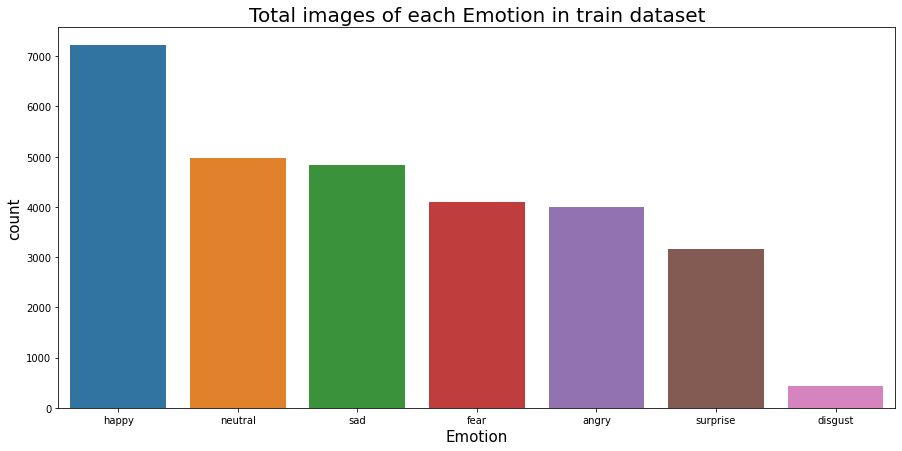

In [22]:
import pandas as pd
import os

df = {}
sum = 0
for i in os.listdir("/content/data/train"):
    directory = "/content/data/train/" + i
    df[i] = len(os.listdir(directory))
    sum = sum + df[i]
df = pd.DataFrame(df, index=["total"]).transpose().sort_values("total", ascending=False)
print("Description of Training Set")
print(df)
print("Total images in the Training set are:  ", sum)
print("\n\n")
plt.figure(figsize=(15,7))
sns.barplot(x=df.index, y="total", palette="tab10", data=df)
plt.ylabel("count",fontsize = 15)
plt.xlabel("Emotion",fontsize = 15)
plt.title("Total images of each Emotion in train dataset",fontsize = 20)
plt.show()


 Description of Validation Set
          total
happy      1774
sad        1247
neutral    1233
fear       1024
angry       958
surprise    831
disgust     111
Total images in the Validation set are:   7178





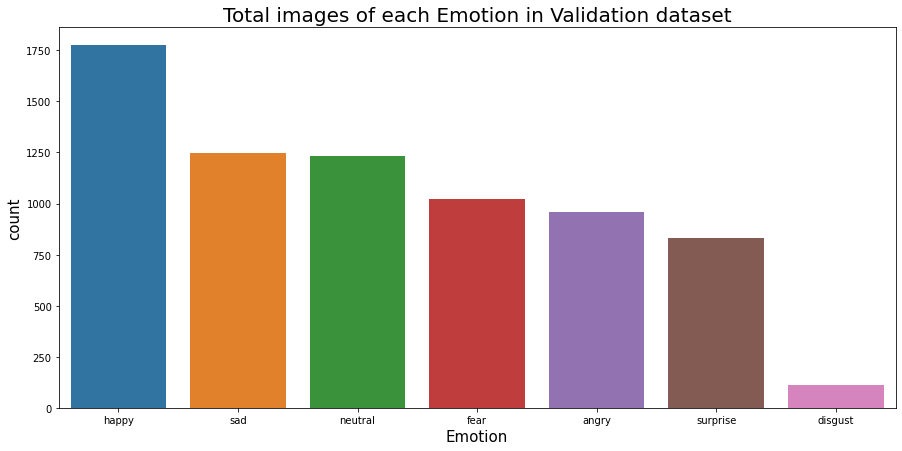

In [ ]:
df = {}
sum = 0
for i in os.listdir("/content/data/test"):
    directory = "/content/data/test/" + i
    df[i] = len(os.listdir(directory))
    sum = sum + df[i]
df = pd.DataFrame(df, index=["total"]).transpose().sort_values("total", ascending=False)
print("\n Description of Validation Set")
print(df)
print("Total images in the Validation set are:  ", sum)
print("\n\n")
plt.figure(figsize=(15,7))
sns.barplot(x=df.index, y="total", palette="tab10", data=df)
plt.ylabel("count",fontsize = 15)
plt.xlabel("Emotion",fontsize = 15)
plt.title("Total images of each Emotion in Validation dataset",fontsize = 20)
plt.show()

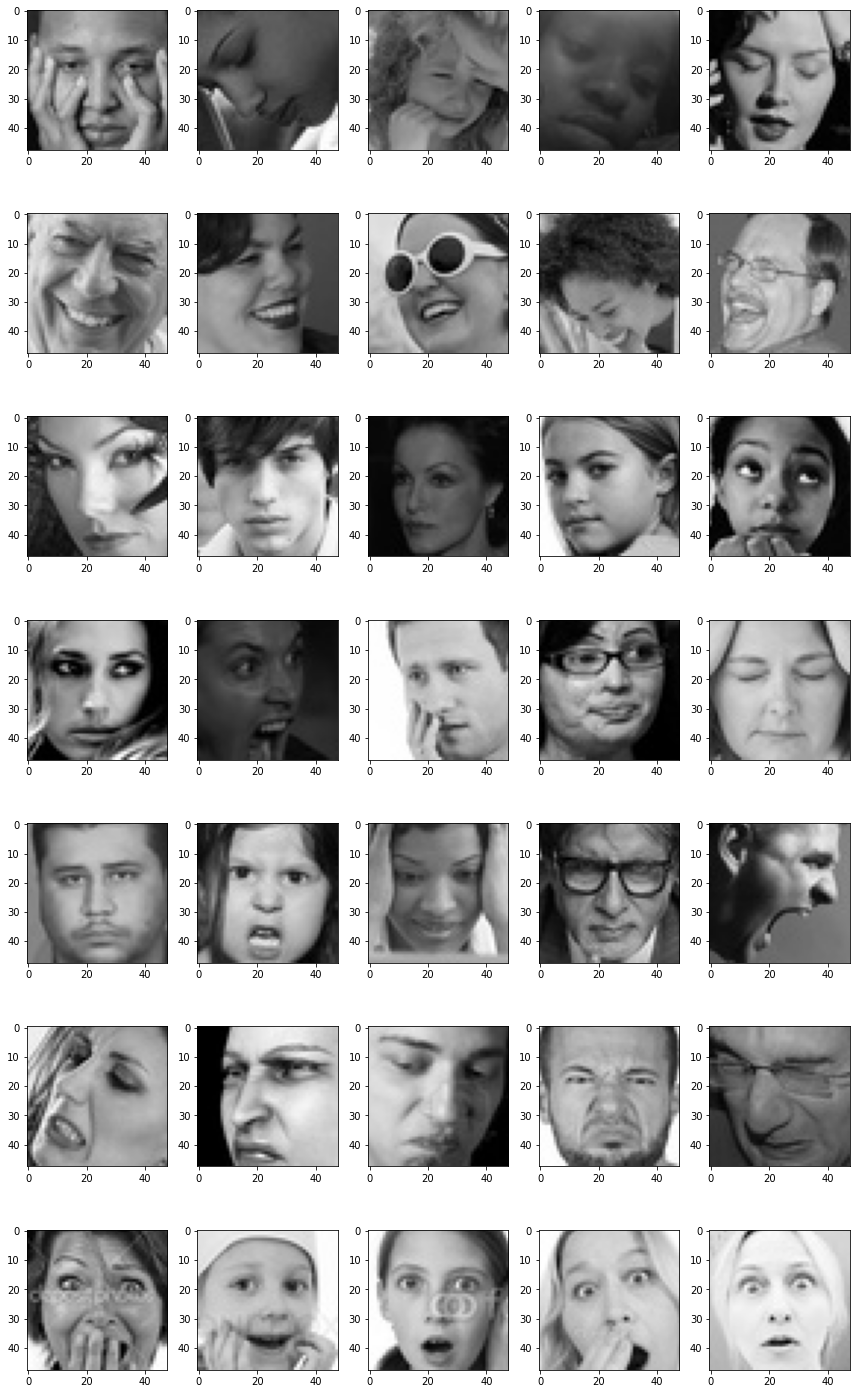

In [ ]:
pic_size = 48
base_path = "/content/data/"
plt.figure(0, figsize=(12,20))
cpt = 0
for expression in os.listdir(base_path + "train"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

# Image augmentation using keras ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128
base_path = "/content/data/"


train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1.0/255)

train_generator = train_datagen.flow_from_directory(base_path + "train",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(base_path + "test",
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#Defining our 4 Convolution and 2 Dense layers model

In [ ]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

nb_classes = 7
model = Sequential()

# 1st - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(56, 56,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

print(model.summary())

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 56, 56, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       2

#Training Model

In [ ]:
%%time

# number of epochs to train the NN
epochs = 50

# checkpoint to save best model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/49
448/448 [==============================] - 235s 521ms/step - loss: 1.8774 - accuracy: 0.2306 - val_loss: 2.5062 - val_accuracy: 0.1825
Epoch 2/49
448/448 [==============================] - 236s 526ms/step - loss: 1.8016 - accuracy: 0.2457 - val_loss: 1.8332 - val_accuracy: 0.2627
Epoch 3/49
448/448 [==============================] - 244s 544ms/step - loss: 1.7880 - accuracy: 0.2536 - val_loss: 1.7678 - val_accuracy: 0.2764
Epoch 4/49
448/448 [==============================] - 261s 584ms/step - loss: 1.7779 - accuracy: 0.2621 - val_loss: 1.7255 - val_accuracy: 0.3066
Epoch 5/49
448/448 [==============================] - 268s 597ms/step - loss: 1.7611 - accuracy: 0.2703 - val_loss: 1.6668 - val_accuracy: 0.3350
Epoch 6/49
448/448 [==============================] - 265s 591ms/step - loss: 1.7387 - accuracy: 0.2869 - val_loss: 1.6402 - val_accuracy: 0.3359
Epoch 7/49
448/448 [==============================] - 259s 577ms/step - loss: 1.7223 - accuracy: 0.3016 - val_loss: 1.6964 -

In [ ]:
model.save("model_weights.h5")

##MODEL EVALUATION

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator)
print("validation accuracy :", str(test_acc*100)+"%")
print("validation loss :", test_loss)

113/113 [==============================] - 10s 90ms/step - loss: 1.0680 - accuracy: 0.5893
validation accuracy : 58.930063247680664%
validation loss : 1.0679700374603271


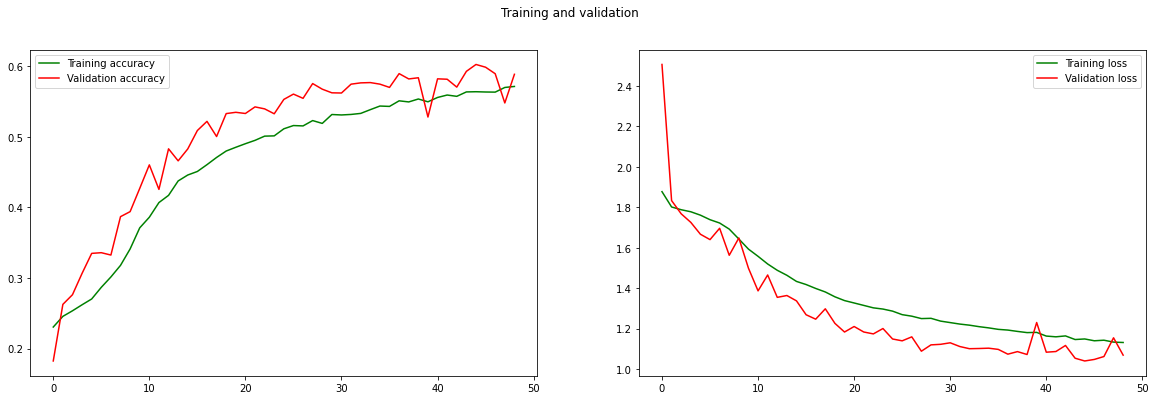

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'g', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'g', label='Training loss')
ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

##CONFUSION MATRIX

113/113 [==============================] - 10s 85ms/step
              precision    recall  f1-score   support

       angry       0.52      0.51      0.52       958
     disgust       0.86      0.17      0.29       111
        fear       0.54      0.18      0.27      1024
       happy       0.82      0.85      0.83      1774
     neutral       0.44      0.74      0.55      1233
         sad       0.49      0.38      0.43      1247
    surprise       0.66      0.76      0.71       831

    accuracy                           0.59      7178
   macro avg       0.62      0.51      0.51      7178
weighted avg       0.60      0.59      0.57      7178





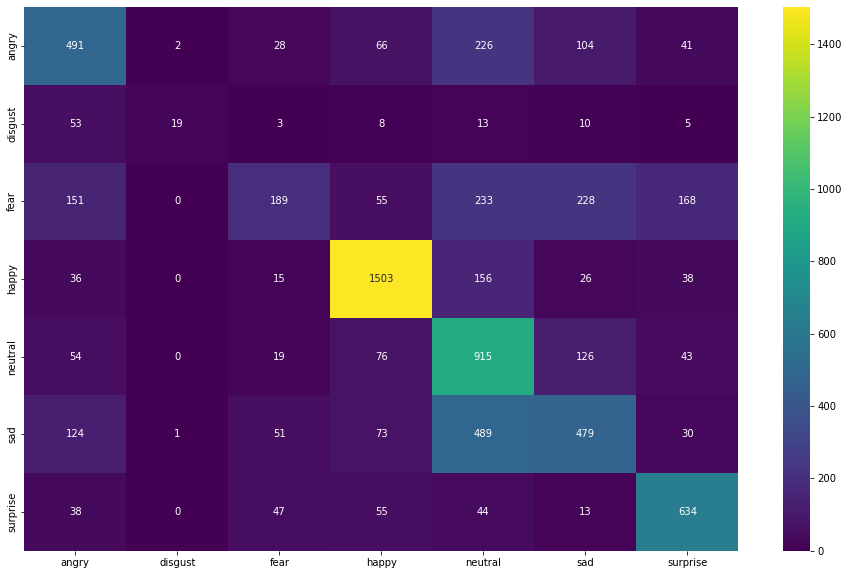

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(model.predict(validation_generator), axis=-1)
print(classification_report(validation_generator.classes, y_pred, target_names=validation_generator.class_indices.keys()), end='\n\n\n')

cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(16,10))
sns.heatmap(cm, cmap=plt.cm.viridis, annot=True, fmt='.0f', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.show()

#Loading Model

In [23]:
import numpy as np
import cv2
from tensorflow.keras.models import model_from_json
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode , b64encode
import PIL
import io
import html
import time

In [24]:
model_json_file = '/content/model.json'
model_weights_file = '/content/model_weights.h5'
with open(model_json_file, "r") as json_file:
    loaded_model_json = json_file.read()
    loaded_model = model_from_json(loaded_model_json)
    opt = Adam(learning_rate=0.0001)
    loaded_model.load_weights(model_weights_file)
    loaded_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#Using Webcam


In [25]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [26]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img


In [27]:


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  
  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x,y,w,h) in faces:
      fc = gray[y:y+h, x:x+w] 
      roi = cv2.resize(fc, (48,48))
      pred = loaded_model.predict(roi[np.newaxis, :, :, np.newaxis])
      text_idx=np.argmax(pred)
      temp = pred
      sum = temp.sum()
      temp = np.divide(temp,sum)
      sum = temp.sum()
      temp = np.around(temp,2)
      temp = np.multiply(temp,100)
      temp = temp.flatten()
      lis = temp.tolist()
      text_list = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
      res = dict(zip(text_list, lis))
      if text_idx == 0:
          text= text_list[0]
      if text_idx == 1:
          text= text_list[1]
      elif text_idx == 2:
          text= text_list[2]
      elif text_idx == 3:
          text= text_list[3]
      elif text_idx == 4:
          text= text_list[4]
      elif text_idx == 5:
          text= text_list[5]
      elif text_idx == 6:
          text= text_list[6]
      cv2.putText(img, text, (x, y-5),
          cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0, 255), 2)
      img = cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
      cv2.imwrite(filename,img)
  return filename,res

#Final Prediction

In [32]:
from IPython.display import Image
import matplotlib.pyplot as plt

try:
  filename, result = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
  print("----------"*10)
  print("\n\n")
  Classes = list(result.keys())
  Percentage = list(result.values())
  plt.bar(range(len(Classes)), Percentage, tick_label=Classes)
  plt.title("Predicted percentage",fontsize = 20)
  plt.xlabel("Emotion",fontsize = 15)
  plt.ylabel("Percentage",fontsize = 15)
  plt.show()
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

local variable 'res' referenced before assignment
